<a href="https://colab.research.google.com/github/VN04/Linear-regression-using-single-neuron/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
tf.reset_default_graph() 

In [0]:
boston_dataset = load_boston()
#print(boston_dataset)
features_df = pd.DataFrame(np.array(boston_dataset.data), columns=[boston_dataset.feature_names])
print("features of the dataset are :\n",features_df.head())


features of the dataset are :
       CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX PTRATIO  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0    15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0    17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0    17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0    18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0    18.7   

        B LSTAT  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [0]:
total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

In [0]:
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [0]:
def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]


In [0]:
y, cost = calc(train_features, train_prices)

In [0]:
learning_rate = 0.025
epochs = 3000
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
points = [[], []]

cost... 670.0958987695201
weight... [[-0.20840121]
 [ 0.91084132]
 [ 0.38554768]
 [-0.31301699]
 [-0.21108801]
 [ 0.97037449]
 [-0.92652166]
 [-0.83737999]
 [ 0.04919238]
 [-0.56991089]
 [ 1.53796423]
 [ 0.52417926]
 [ 0.17973465]]
bias... [1.27423335]
cost... 78.84234281607543
weight... [[ 0.09301628]
 [ 0.27702698]
 [ 0.04726841]
 [-0.03161778]
 [ 0.01134127]
 [ 0.16120038]
 [-0.29318583]
 [-0.32608613]
 [ 0.14658556]
 [-0.14445234]
 [ 0.18295477]
 [ 0.0233109 ]
 [ 0.25065532]]
bias... [25.3413281]
cost... 78.73637382596945
weight... [[ 0.03438877]
 [ 0.08091659]
 [ 0.00186257]
 [-0.01172644]
 [-0.03020794]
 [ 0.04978742]
 [-0.10916155]
 [-0.13413767]
 [ 0.04865667]
 [-0.03753167]
 [ 0.04071143]
 [ 0.00448899]
 [ 0.1024013 ]]
bias... [25.48381803]
cost... 78.72686483045862
weight... [[ 0.01716262]
 [ 0.02541825]
 [-0.0010814 ]
 [-0.00438361]
 [-0.02790721]
 [ 0.01771088]
 [-0.04043483]
 [-0.05606007]
 [ 0.01622084]
 [-0.00931748]
 [ 0.00866986]
 [ 0.00071005]
 [ 0.04143359]]
bias... 

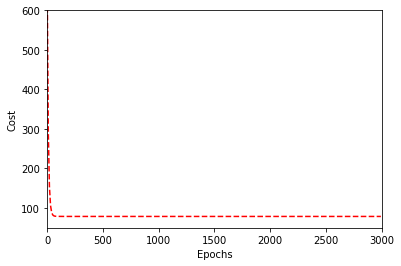

final value of weight is
 [[ 2.09965076e-09]
 [ 8.13343906e-10]
 [ 5.38119934e-10]
 [-2.33008005e-10]
 [-4.45866025e-09]
 [-7.49580335e-10]
 [ 4.31459214e-10]
 [-2.40407341e-09]
 [ 5.09154512e-10]
 [-2.78706798e-10]
 [-5.72715140e-10]
 [ 3.72803397e-11]
 [ 4.54567477e-11]]
final value of bias is
 [25.48466667]
Validation error = 104.34367777777742 

Test error = 123.3335734758902 



In [0]:
with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print("cost...",sess.run(cost))
            print("weight...",sess.run(w))
            print("bias...",sess.run(b))

    #writer = tf.summary.FileWriter('/home/vaishnavi/Knowledge Practical/graphs', sess.graph)
    plt.plot(points[0], points[1], 'r--')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]
    print("final value of weight is\n",sess.run(w))
    print("final value of bias is\n",sess.run(b))

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_cost), '\n')